# Notebook for steady state superradiance

In [1]:
from pim2 import *

## System Parameters

# Number of two-level systems 
N = 10
nds = num_dicke_states(N)
print(N, nds)

## Lindblad dynamics coefficients

# spontaneous emission coefficient
gS = 1

# incoherent pumping coefficient
gP = 1

# nonradiative emission (i.e. losses) coefficient
gL = 0

# dephasing coefficient
gD = 0

# collective pumping coefficient
gCP = 0

10 36


In [2]:
# integration time vector parameters: number of steps
nt = 1001

# choose timescale (tmax) between superradiant Delay time (tD0) and incoherent exponential decay (exp) 
tD0 = np.log(N)/(gS * N)
tfac = 20
tmax = tfac * tD0
t = np.linspace(0, tmax, nt)

In [3]:
# Initial state |j0, m0 >
j0 = N/2
m0 = -N/2 

initial_state = dicke_state(N, j0, m0)

In [4]:
# initialize the matrix suing the 'pim' class
pim = Pim(N, gS, gL, gD, gP, gCP)
M = pim.generate_matrix()
sparse_M = pim.generate_sparse()

In [5]:
# integrate the ODE and calculate the density matrix evolution
rho_t0 = initial_state
rho_t = odeint(get_rhs, rho_t0, t, args=(sparse_M,))

# define special interesting Dicke states in order to plot their time evolution
# | N/2, N/2>
VN2 = rho_t[:, 0]
# | N/2, 0> (N even) or # |N/2, 0.5> (N odd)
VN = rho_t[:, int(0.5 * N)]
# | N/2, 0> (N even) or |N/2, -1/2> (N odd)
V0 = rho_t[:, -1]
# | N/2, -N/2 > 
VGS = rho_t[:, int(N)]

In [6]:
# use the functions defined in the 'pim' class to calculate operators' evolutions
jzt = jzn_t(rho_t, 1)
jpjmt = jpn_jmn_t(rho_t, 1)
j2t = j2n_t(rho_t, 1)

# Plots 

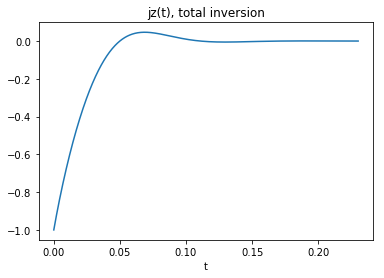

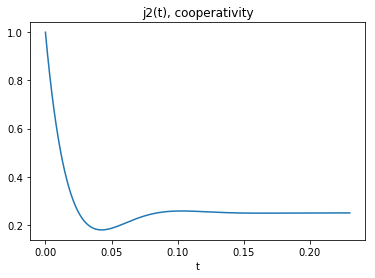

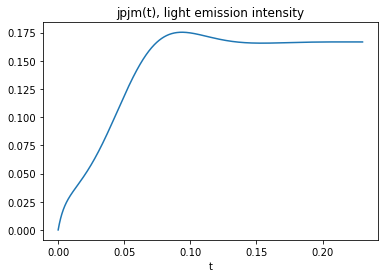

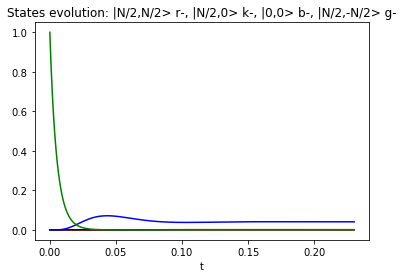

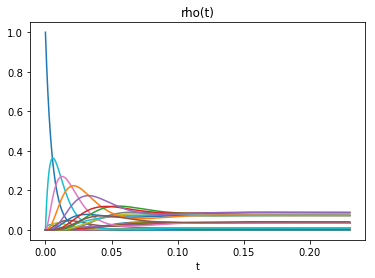

In [7]:
j2max = (N/2*(N/2 + 1))
jmax = N/2

fig1 = plt.figure()
plt.plot(t/tfac, jzt/jmax)
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t/tfac, j2t/j2max)
plt.title('j2(t), cooperativity')
plt.xlabel('t')
plt.show()
plt.close()

fig3 = plt.figure()
plt.plot(t/tfac, jpjmt/j2max)
plt.title('jpjm(t), light emission intensity')
plt.xlabel('t')
plt.show()
plt.close()

fig4 = plt.figure()
plt.plot(t/tfac, VN2, 'r-',t/tfac, VN, 'k-',t/tfac, V0, 'b-',t/tfac, VGS, 'g-')
plt.title('States evolution: |N/2,N/2> r-, |N/2,0> k-, |0,0> b-, |N/2,-N/2> g-')
plt.xlabel('t')
plt.show()
plt.close()

fig5 = plt.figure()
plt.plot(t/tfac, rho_t)
plt.title('rho(t)')
plt.xlabel('t')
plt.show()
plt.close()

In [8]:
# Include losses in the model (gL)
n_thermal = 1
g_reference = 1
gP = n_thermal * g_reference
gL = g_reference * ( n_thermal + 1)
gS = 1

tD0 = np.log(N)/(gS * N)
texp = 1/(gS + gL)
tchar = min(tD0, texp)
tmax = tfac * tchar
tmax = tfac * tD0
t = np.linspace(0, tmax, nt)

# initialize the matrix suing the 'pim' class
pim = Pim(N, gS, gL, gD, gP, gCP)
M = pim.generate_matrix()
sparse_M = pim.generate_sparse()
rho_t = odeint(get_rhs, rho_t0, t, args=(sparse_M,))
jpjmt = jpn_jmn_t(rho_t, 1)
print(gL/gP)

2.0


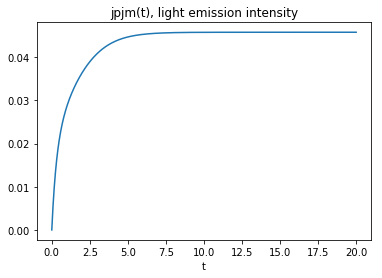

In [9]:
fig6 = plt.figure()
plt.plot(t/tchar, jpjmt/j2max)
plt.title('jpjm(t), light emission intensity')
plt.xlabel('t')
plt.show()
plt.close()

In [10]:
# Cycle on coefficient range
exponent = 5
exp_size =100
exponent_list = np.linspace( - exponent, exponent, exp_size)
gP_gS = 10**exponent_list
max_jpjm = np.zeros(np.size(exponent_list))
gS = 1 
n_thermal = 2
for i in range(exp_size):
    gP = gS * gP_gS[i]
    gL = gP + gP/n_thermal
    gL = 0
    pim = Pim(N, gS, gL, gD, gP, gCP)
    M = pim.generate_matrix()
    sparse_M = pim.generate_sparse()
    rho_t = odeint(get_rhs, rho_t0, t, args=(sparse_M,))
    jpjmt = jpn_jmn_t(rho_t, 1)
    max_jpjm[i] = max(jpjmt) 


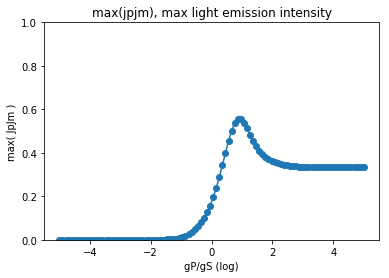

In [11]:
fig7 = plt.figure()
plt.plot(np.log10(gP_gS), max_jpjm/j2max, 'o-')
plt.title('max(jpjm), max light emission intensity')
plt.xlabel('gP/gS (log)')
plt.ylabel('max( JpJm )')
plt.ylim([0, 1])
plt.show()
plt.close()

In [12]:
def thermal_state( N, temperature):
    
    nds = num_dicke_states(N)
    rho_thermal = np.zeros(nds)
    
    return rho_thermal

range(0, 100)

In [ ]:
    num_ladders = num_dicke_ladders(N)
    ll = 0
    for kk in range(1, int(num_ladders + 1)):
        jj = 0.5 * N + 1 - kk
        mmax = (2 * jj + 1)
        for ii in range(1, int(mmax + 1)):
            mm = jj + 1 - ii
            jz_n = jz_n + (mm ** n) * p[:, ll]
            ll = ll + 1
